## 16. Регуляризация А.Н. Тихонова
Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ называется *регуляризованной* по отношению к системе
$Ax = b$. Параметр $\alpha$ называется *параметром регуляризации*. 
*Метод регуляризации* А.Н.\,Тихонова заключается в выборе
последовательности $\alpha_k \to 0$ (например, геометрической прогрессии) 
и решении регуляризованных систем
$(A^{\rm T}A + \alpha_k E)x = A^{\rm T} b$ для конечного числа
значений $\alpha_k$, и выборе из всех полученных решений того, при котором
норма невязки для исходной системы минимальна.

Написать функцию 
```
    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha),
```
в которой `A` и `b` – матрица и левая часть исходной системы,
`alpha` – вектор, содержащий набор параметров регуляризации,
`x` – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения 
параметра регуляризации, `discr` – вектор полученных таким образом невязок, `x0` – регуляризованное решение
(из найденных) с минимальной нормой невязки, `discr0`, `alpha0` – соответствующие ему
значения нормы невязки и параметра регуляризации.

Провести эксперимент с плохообусловленными системами из № 8.

Подключим необходимые библиотеки


In [2]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt

Напишем саму функцию, которая будет принимать на вход матрицы A, b и вектор alpha, содержащий набор параметров регуляризации. 
Выдавать функция будет `x0` – регуляризованное решение
(из найденных) с минимальной нормой невязки, `discr0`, `alpha0` – соответствующие ему значения нормы невязки и параметра регуляризации, `x` – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения параметра регуляризации, `discr` – вектор полученных таким образом невязок.

In [3]:
def tikhonov(A, b, alpha):
    At = np.transpose(A)
    x = []
    discr = []
    for i in range(len(alpha)):
        xx = linalg.solve((At@A + alpha[i]), (At @ b))
        x.append(xx)
        discr_c = linalg.norm(A@xx - b)/linalg.norm(b)
        discr.append(discr_c)
    jmin = 0
    discr0 = discr[0]
    for j in range(len(discr)):
        if discr[j] < discr0:
            jmin = j
            discr0 = discr[j]
    x0 = x[jmin]
    alpha0 = alpha[jmin]
    return (x0, discr0, alpha0, x, discr)


Напишем фукцию, которая будет принимать на вход размерность матрицы, а выдавать плохообусловленную матрицу.

In [4]:
def badMatrix(n):
    C = np.random.uniform(-100, 100, (n, n))
    L = np.tril(C)
    C = np.random.uniform(-100, 100, (n, n))
    U = np.triu(C)
    return L@U

Но для начала проведем эксперимент на обычных матрицах. Сравним значения невязок для обычной системы $Ax = b$ и регуляризованной $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ 

In [5]:
n_vector = np.arange(10, 500, 5)
n_discr0 = []
for i in n_vector:
    A = np.random.uniform(-100, 100, (i, i))
    b = np.random.uniform(-100, 100, i)
    x = linalg.solve(A, b)
    dr = linalg.norm(A@x - b)/linalg.norm(b)
    n_discr0.append(dr)

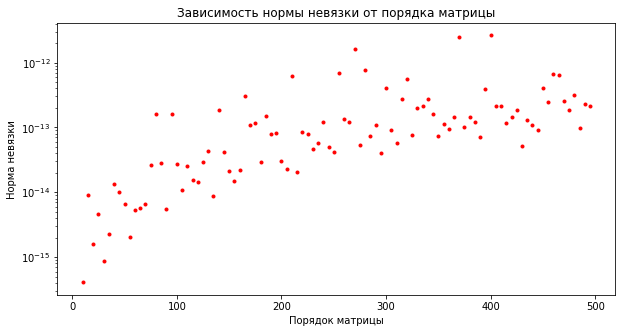

In [6]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.r')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass

In [7]:
n_vector = np.arange(10, 500, 5)
n_alpha0 = []
n_discr0 = []
for i in n_vector:
    A = np.random.uniform(-100, 100, (i, i))
    b = np.random.uniform(-100, 100, i)
    alpha = np.linspace(0.0002 * i, 0.0002, i)
    t = tikhonov(A, b, alpha)
    n_alpha0.append(t[2])
    n_discr0.append(t[1])

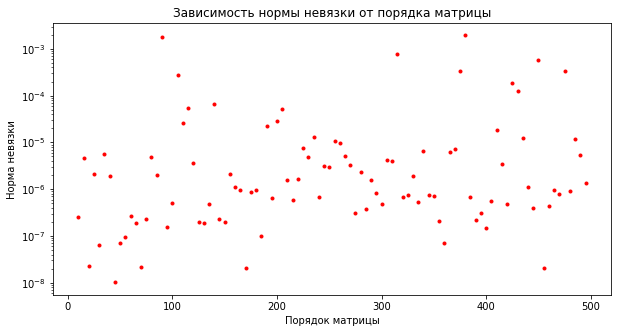

In [8]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.r')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass

Как мы можем заметить, в первом случае, чем больший порядок у матрицы, тем выше значение невязки, во втором же случае такую зависимость пронаблюдать весьма затруднительно.
Так же можно заметить, что во втором случае значения невязки получаются выше, чем в первом.

Теперь проведем те же эксперименты, но для плохообусловленных матриц.

In [6]:
n_nvector = np.arange(10, 500, 5)
n_discr0 = []
for i in n_nvector:
    A = badMatrix(i)
    b = np.random.uniform(-100, 100, i)
    x = linalg.solve(A, b)
    dr = linalg.norm(A@x - b)/linalg.norm(b)
    n_discr0.append(dr)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.35502e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.03411e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.05717e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.94354e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.83841e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.84012e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.67657e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.4106e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.14243e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.24065e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.4925e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.62454e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.38058e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.60515e-22): result may not be 

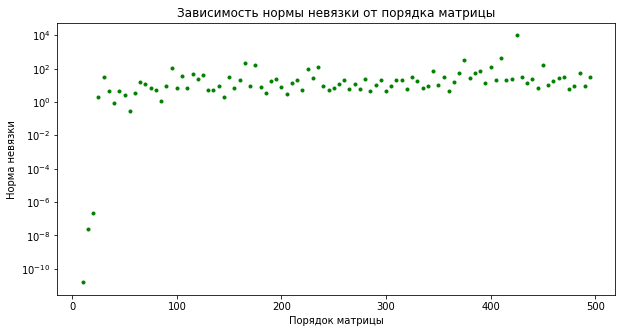

In [7]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.g')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass


Сразу отметим, что у плохообусловленных матриц при решении обычной системы зачение невязки будет во много раз выше, чем у обычной матрицы при том же решении.

In [8]:
n_vector = np.arange(10, 500, 5)
n_alpha0 = []
n_discr0 = []
for i in n_vector:
    A = badMatrix(i)
    b = np.random.uniform(-100, 100, i)
    alpha = np.linspace(0.0002 * i, 0.0002, i)
    t = tikhonov(A, b, alpha)
    n_alpha0.append(t[2])
    n_discr0.append(t[1])
    

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.59985e-18): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.34731e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.66548e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.97542e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.15177e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.47783e-18): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.09834e-19): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.94729e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.0259e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.44301e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.39938e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05302e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.03041e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.08694e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.42925e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.46471e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.99296e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.16418e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.34549e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.51184e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05798e-19): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.2599e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.26281e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.76136e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.74565e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.5206e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.37851e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44932e-19): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.07588e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.64151e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.89309e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.12191e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.76649e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.96614e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.4832e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.70229e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.83145e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.79214e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.05882e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.23722e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00045e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.06252e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.54388e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.44317e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01452e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.34426e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.93731e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.83617e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01193e-19): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.1199e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.79215e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.78122e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.58657e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6717e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.79922e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.98399e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.32901e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.53959e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.85776e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.32495e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26363e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.4829e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25418e-19): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.27548e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51687e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.32419e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.3113e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.77139e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.0356e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.20003e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.93516e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.9377e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.8977e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.89257e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.92315e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.49681e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.00848e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15976e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.27614e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77764e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.79563e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05183e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.96171e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.12294e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23528e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.79509e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.70718e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.12107e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.66814e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.31209e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.54592e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.53119e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.93268e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.78822e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.19065e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.36177e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.6258e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.2994e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.6888e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.10363e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.39057e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.33386e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.61946e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.154e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.85644e-20): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.46689e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15643e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.75376e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.84107e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.65718e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.2553e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.41528e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.37548e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.23045e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.87002e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.51357e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.40741e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.03053e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.99487e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.58875e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20513e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05602e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.50828e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.27039e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.43189e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.47583e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.39893e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.65473e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.64841e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.2013e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.89927e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.14588e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37893e-19): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.8114e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.92307e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6327e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.31063e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.37551e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.61076e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.93152e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.6205e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.31511e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.74919e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.51921e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.93173e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.45968e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.08663e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.09799e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.45085e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.75044e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.64618e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.99004e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.06559e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.02745e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.53484e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.73242e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.36368e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.81725e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.5006e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.60347e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11004e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.22663e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.43068e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.54015e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.64522e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.82473e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.27005e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.3362e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59011e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.38321e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.63884e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.66445e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.33472e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.58992e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.33505e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29704e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.42617e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12749e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.68354e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.33976e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.71166e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.82686e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.12629e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.11575e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.91848e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.73452e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.54953e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.13014e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.66888e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.60063e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.83221e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.88221e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6057e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.13453e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.25952e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.75118e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.18588e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.5199e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29969e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.9728e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.7822e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05535e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.42769e-21): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25029e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.93798e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.48994e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.5315e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.8452e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.73191e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.32529e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.64498e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.10782e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.08198e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.35678e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.48181e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.90856e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.7328e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.77828e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00348e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.62076e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.51176e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.03466e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.89788e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37666e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.22528e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.42117e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.50659e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09544e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.33483e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.90991e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.92998e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.08236e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.4791e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.37225e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.11941e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.33917e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.26002e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.91478e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.2318e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.58779e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.68939e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.91652e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.41822e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.46731e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.41677e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.57906e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.64083e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.57044e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.90038e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.77928e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.1322e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.89937e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.43735e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.32786e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.59961e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.27396e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.7845e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.17343e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.09184e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.73528e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.19499e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.40054e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.91828e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.11108e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.24165e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.53385e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36338e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.56811e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.60002e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.07581e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.38067e-19): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.34978e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.74263e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02027e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81825e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.46212e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.48821e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.61282e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.72929e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.08744e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.45159e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.85582e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44896e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.09964e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.66655e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.98316e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.50023e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51903e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.45756e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.34024e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.16865e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.26249e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.80266e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.14156e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.10632e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.78702e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.39671e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23839e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23955e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.40097e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.45095e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.11668e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.47299e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.22344e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.35521e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.22702e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.4173e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.06121e-19): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.74387e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.50981e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.64405e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.37758e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.18403e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.36017e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.38922e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.00542e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.76453e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.22115e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.34283e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.49925e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.25749e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.26819e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.19907e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.92287e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.18335e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51214e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36466e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02435e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.35004e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.745e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.20242e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12506e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.29734e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.08479e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.56994e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.43198e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.7203e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.34338e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.18892e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.82699e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.60032e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.09841e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.68167e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.07433e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.235e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.48902e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.30974e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.52665e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.69103e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.62488e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.96622e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.80566e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.3803e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63376e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.53586e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26751e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.46472e-23): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.28877e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29813e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.97642e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07031e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.22601e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.81107e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.37077e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.1923e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.59044e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.24226e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00277e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20873e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.24408e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.16929e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.33447e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.43115e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.73088e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.35117e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.54425e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.26534e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01258e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.70827e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.47361e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.70932e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.36095e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.71631e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.87731e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.46008e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.72862e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20023e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.56453e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.91985e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10171e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.40302e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.45424e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.78219e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.19239e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.90411e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.60626e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.33365e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.0067e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.31721e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.84483e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04803e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.64429e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52554e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.89091e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.22712e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.15742e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.71732e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.70803e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.71784e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15363e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.22281e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.07726e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.86116e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.54509e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.75917e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.49086e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.71648e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.2278e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.85386e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01495e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.69703e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.19595e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.69887e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.44844e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.42165e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.01026e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.87821e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.01016e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.18357e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.99124e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.5477e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.07093e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.13022e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.56501e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29886e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.55328e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26627e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.33204e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.57613e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.87539e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.70453e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.20165e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.30896e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.3661e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.64199e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.54823e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.26923e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.33644e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.84657e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.91832e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.31014e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.19323e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.27713e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.86225e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29152e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.46955e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.41503e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.26613e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10823e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.45756e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.34956e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.08098e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63544e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.25451e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.13183e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.26164e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.04468e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.2703e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.03163e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.26687e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.77212e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.48341e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.14414e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.85408e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77787e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.46418e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.34231e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52129e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.66463e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.17478e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.83343e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.20204e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.15267e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00618e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10755e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.59019e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26712e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.24808e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.55836e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.17448e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.41597e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.24105e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52559e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77942e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04278e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6812e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.06841e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.60606e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.55385e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.82622e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.1673e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02118e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.19248e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.71813e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.92614e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.78982e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.7848e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.42438e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.18796e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.35567e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.16643e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12192e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59099e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.88066e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.17862e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.40752e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.38998e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.62559e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.61954e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.44753e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.98158e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.70462e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11917e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.45292e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.97832e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.74657e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.33242e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.29717e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.04688e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.78702e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.30404e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.54768e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.5053e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.99661e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.45362e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.88295e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.48143e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.21797e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.38891e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.82605e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.04609e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.71744e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.71868e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.33856e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.71494e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.1617e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.50853e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.34857e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.48683e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.19202e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.89748e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.82157e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.4945e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.44416e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.59178e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.25613e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.76488e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.27644e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.43167e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.46636e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.80774e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.88714e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.24874e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.2696e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01758e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.24985e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.34946e-22): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.34294e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.79117e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02575e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.09791e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.02816e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.36501e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.0254e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.92086e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.18941e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.74097e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.31993e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.06813e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.93864e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.98345e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.44428e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59273e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.79506e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.84008e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.60875e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.13433e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.3404e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.37229e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07615e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.77631e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.70569e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01532e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.75637e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.91587e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.74524e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.47403e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.58944e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.2399e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.37737e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.92978e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.71284e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.35181e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01569e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.6051e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.86027e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.10334e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.74722e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.71548e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.09305e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81669e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.20318e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.81025e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.74143e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.30779e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.044e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.41874e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.62419e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.1786e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.10414e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.12676e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.49622e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.49483e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.11865e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.74079e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.27799e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07738e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.17846e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.46944e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.09258e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.12776e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15909e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.32753e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.03595e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.063e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.50156e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.6559e-20): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.67257e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23639e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.29341e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.93991e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.01707e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.73305e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.18244e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.93053e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.83755e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23351e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.46347e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.42824e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.02008e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.24604e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.80038e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11252e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07276e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.44518e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.54646e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.97493e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.35171e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20929e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.92275e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.73061e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.46224e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.0177e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.62941e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.17181e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51231e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00616e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.36746e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.0479e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12752e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.60217e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.41031e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02097e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09706e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63801e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.7639e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05568e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.98669e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.55392e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.13089e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37262e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.85059e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.35696e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.64215e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.50567e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.05308e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.27304e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.66584e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.56043e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.66977e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02254e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11367e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.57049e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.21581e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.27999e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.49235e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.92768e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.69757e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01998e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26403e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.88761e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09613e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.04272e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10313e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6026e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.5973e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15243e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.30439e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.0102e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.73919e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.74879e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63887e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.61279e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.1319e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.65248e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.09323e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.03821e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.32209e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.28215e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.49736e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.3562e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.21685e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.53606e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.30836e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.34606e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.50167e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.48276e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20854e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.62491e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.89048e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.88399e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.30015e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.03636e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.54293e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.5853e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63192e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.31918e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.06034e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.32509e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.58306e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.72107e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.53185e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.94604e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.47383e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.0399e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.23676e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.06551e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.17822e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02431e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.27053e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.06317e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.15403e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.94967e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.71579e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.93848e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.46783e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.61164e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.27432e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.50075e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.06059e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.22593e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12932e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.31884e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63529e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07716e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.3512e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.98753e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.93651e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.77604e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.62816e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.64419e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.16891e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.14835e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.08055e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.80722e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77573e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.41138e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.28826e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.97919e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.06321e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.64907e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.13454e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.38632e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.72664e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26374e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.99735e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.76516e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.08827e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.601e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.08078e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.79665e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.43746e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.38283e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20424e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.0438e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.19697e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.73458e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.16705e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.59542e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.2459e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.22235e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.2431e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.54939e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.62352e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.90743e-22): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.65984e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.70143e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09043e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.20822e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.97152e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.16989e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.98344e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.92548e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.76075e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.0075e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.16258e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.74358e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.88391e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.86091e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52731e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.59317e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.47366e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.09669e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.59537e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.16382e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63309e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.71567e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.28323e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.42751e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.18979e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51415e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.03028e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.85131e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.47044e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25315e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.00497e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.70633e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.74297e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.46567e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20948e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.74517e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01723e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.47651e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.29267e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.97113e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.10551e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.55722e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.05165e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.32042e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.3917e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.82469e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.7986e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.62865e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.50051e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.37351e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.31814e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63485e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.81134e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.84649e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.54306e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.49232e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.2787e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.26092e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.42217e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.4175e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.2261e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10703e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.75201e-21): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.79771e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.48318e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04706e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.16032e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.35143e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.36175e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.73604e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.71169e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.92013e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.4386e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.27396e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.06128e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.42385e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.22312e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.36235e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.55455e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.14852e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.23712e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.93923e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.67114e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77278e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.58096e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.80481e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.80045e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.99578e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.53296e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23755e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.10039e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.12815e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.32118e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.80823e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.92435e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36325e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.21694e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.96502e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.66633e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.79315e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.54838e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.70367e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.69143e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.87954e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.26145e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.97983e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51261e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.31497e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.35178e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.13169e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52412e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.86333e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.10624e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.124e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.47097e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.08242e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.43822e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.87861e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.02288e-23): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.80358e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.78092e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.74448e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.11798e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.66004e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.80269e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.20182e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.86242e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.67397e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.47835e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.47737e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.61466e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.89987e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.62434e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.16232e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.09417e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.52914e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05486e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.87393e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.9417e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81233e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.33213e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.19332e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.03397e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81796e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.57869e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.69796e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.50904e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.68141e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.5716e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.26387e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.94305e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.06158e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.69345e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.90606e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.58303e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.49164e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.19434e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.21014e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.05857e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.58822e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.60422e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.82914e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.47641e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.14457e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.35256e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.496e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.29431e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.49763e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.87229e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29691e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.49647e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.43252e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.31717e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.97548e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.40624e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.87781e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.14717e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.74329e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.47944e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.19074e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.74781e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.90861e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.08828e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.0022e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.04915e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52948e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.70919e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.71967e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.00803e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.53925e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.75695e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23306e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.20763e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.10767e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59642e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.1434e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.4041e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.58019e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.61477e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.20053e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.49837e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00711e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.38399e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01444e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.89255e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.31741e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.32545e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.42153e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.37965e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29013e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.90104e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.54198e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.00075e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.2402e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29803e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.42827e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.62796e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.23706e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.15453e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.04912e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.04773e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.3312e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.5186e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.75236e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.21589e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05032e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.85733e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.74554e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.56022e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.7113e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.97012e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.23854e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.34369e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07577e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.61708e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.86949e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.62086e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.78565e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.14241e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.77195e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.34855e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.13577e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.38716e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.81745e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81549e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.21324e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.21059e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.98782e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.81879e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.55473e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.26846e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.91217e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04327e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.04601e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.36852e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.22705e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.62027e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.9845e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.1338e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.77624e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.30264e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.09408e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.42339e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.39184e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.32425e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.69395e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23593e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.24474e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.6374e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.10961e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37573e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10377e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.42935e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.84843e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07457e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.93459e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.93744e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.34731e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.45779e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.21075e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.76507e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36265e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.29627e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.85046e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.39128e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.34734e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.83736e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.5634e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.35215e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.20174e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.15241e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.92831e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.05611e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.44926e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.49441e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.39972e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.60839e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.95536e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.29983e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.66394e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.67336e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6567e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.88833e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.13519e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.57599e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.20018e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.41017e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.56009e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.18988e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51976e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.38169e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.62161e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.55465e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.42808e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01562e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.5658e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.61746e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.31123e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.85457e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.56675e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.64773e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.62271e-22): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.15679e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.82834e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.67261e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.17459e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.97708e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.26036e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.96043e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.55174e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.39079e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.06858e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.79981e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.70733e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.3006e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.6758e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.0002e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.04586e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01248e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.67753e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.55403e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.69919e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.31399e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.30166e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.86834e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01383e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.64539e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.47444e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.94209e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.29051e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01676e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.18244e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.65441e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.47471e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.8072e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.5712e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.66162e-20): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37106e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.70086e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.96266e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.26823e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02897e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.27592e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05705e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11296e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.32613e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.94137e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.19839e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59895e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.08073e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.84457e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.79669e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.09835e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.2485e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77582e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07199e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.59932e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44934e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.81523e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.38807e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.47057e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.46668e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.76516e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.21742e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52125e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.66876e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59558e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.58341e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.41094e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59063e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.27984e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11164e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.90342e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.84599e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.76797e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.19442e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.30432e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.46725e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.85425e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.68778e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.65459e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.66517e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.98897e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.70758e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.77228e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.58243e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.7365e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.0996e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.47515e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.96048e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.0988e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.23794e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.84776e-22): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.6106e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.33834e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.2052e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.88484e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.18124e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.41555e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.89412e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12586e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.73311e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.29432e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.28821e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.8431e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.04285e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.06508e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.06432e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.83432e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.86132e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.33733e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77186e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.93249e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.02665e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.46149e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.02769e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26091e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.27257e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.31315e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.04866e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.10696e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.02816e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.65381e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.58056e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.32602e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.82717e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23514e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.2674e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.4787e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.34738e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.92201e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.12271e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.60946e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52974e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.36801e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.26587e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.80933e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.42002e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.41966e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.02258e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.48984e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.54493e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.00864e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.20256e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.33464e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01522e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.28433e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.90269e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.63614e-23): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.01838e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.21418e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.10618e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.75392e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.48404e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.23511e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.29315e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52329e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.21798e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.21912e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.73582e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.40359e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.9727e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.50262e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.34105e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.2097e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.44297e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.21613e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.34299e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.51431e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.33166e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.60822e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02109e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.53949e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.8663e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.49752e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.75176e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25632e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29493e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.32827e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.21084e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.16478e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.71165e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.25698e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.28985e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.78227e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05904e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.12189e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23195e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.26915e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.20884e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.7749e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.3611e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.64456e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.45439e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.27361e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.13289e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.21452e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.21372e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.13516e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.57168e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.8454e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.35017e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.60022e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.63736e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6523e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.86898e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.21387e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.91351e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59266e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.90789e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.02621e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.13812e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.44149e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.5507e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.23142e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.30926e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.96557e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.00927e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.69123e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.01381e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25453e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.92103e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.03997e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.91797e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.43176e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05263e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81645e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44373e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.44243e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.71974e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.08379e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.38814e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10142e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.96732e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.12876e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.84807e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.0624e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.03329e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.9605e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.76647e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.9491e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.63485e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.04642e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.00207e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.54666e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.20929e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.63061e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25291e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.32401e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.32093e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.28729e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.65944e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02907e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.68674e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15631e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.80338e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.45317e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.77301e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.23948e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.82979e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.65759e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.89164e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.43266e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.73638e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.8028e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.97005e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.80007e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.89935e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.25399e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.88847e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.91698e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.70993e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.0784e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.71333e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.79718e-22): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.3573e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.4257e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.38811e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.87847e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.21147e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63912e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.81577e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.79025e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.06909e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.62905e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.07937e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01629e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.2849e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.77453e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.08786e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.95902e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.3983e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.80354e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.10817e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.00352e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.28799e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.86462e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.35045e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.32767e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.74802e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.61629e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.61694e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.88868e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.7114e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.52664e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.96641e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.25034e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.75342e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.87402e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.5203e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.74613e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.53132e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.70086e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.65276e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.35715e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.88756e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09675e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.02525e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.52599e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.96491e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.99624e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.98733e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.55694e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.42582e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.80073e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09947e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.60532e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.65502e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.6055e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.92908e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.40914e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.47132e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.17768e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.96189e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.78091e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.10746e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.1736e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04042e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.87589e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.37417e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.19057e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.2447e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.59612e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.40668e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.18566e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.83156e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.41421e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.82799e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.16554e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.77794e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.81931e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.9336e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.4078e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.5173e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.31174e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.84614e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.87389e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.62307e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.43114e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.85569e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.73608e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.03821e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.61535e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.86385e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.14396e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.24372e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.13514e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.06892e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.8124e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.25198e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.18878e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.31824e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.75918e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.60806e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.4999e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07251e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.79121e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.9012e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.29768e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.50547e-22): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.2692e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.46259e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.77946e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.29205e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.10493e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.22665e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04413e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.64158e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.88396e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.89806e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.18439e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.42053e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.61094e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.78981e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.38591e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.40649e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.04246e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.52937e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.48143e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.95242e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.20882e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.43468e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.44107e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.41173e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.64768e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25858e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.59952e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.29582e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.75212e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.76297e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.0381e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.33261e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.34273e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.17101e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.61699e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.57448e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.06963e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05484e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63795e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.32833e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.57733e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.89542e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.99222e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.74078e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.4235e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.13587e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.93488e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.97067e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.15193e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01798e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.46622e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.59937e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.80546e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.35632e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.77486e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.35244e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.01876e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12683e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.14204e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.49107e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.84267e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.86878e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.86719e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.68769e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.72236e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.76675e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.6512e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.0095e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.30627e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.34263e-22): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36362e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.36667e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.2087e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.35375e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.32063e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.60592e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.42257e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.50021e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.147e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36653e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.9057e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.96844e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.5474e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.49673e-21): result may not be ac

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.39426e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.25328e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.26423e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.57586e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.59168e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.51783e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.55353e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.58554e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.16203e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.43155e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15848e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.98733e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.13938e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.99315e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.21801e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.15217e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.72421e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.13286e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.67642e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.73814e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.93067e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.69665e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.72804e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00865e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.18677e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.07069e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.66454e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.87099e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.31936e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.20083e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.38838e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.08288e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.22877e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.59615e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.1233e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.83025e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.42953e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.04429e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.81366e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.9349e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.42488e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.57084e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.87485e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.27704e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.09794e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.67733e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.53448e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.11699e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15264e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.91107e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.756e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.47057e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.99879e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.04392e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.53232e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.50412e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63222e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.63772e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.71345e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.6911e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.46333e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.03839e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.43736e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.35249e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.98769e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.01681e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.17741e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.20913e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.03573e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.33443e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.19118e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.35971e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.18154e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.41487e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.83014e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.35794e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.17925e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.86647e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.99309e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.93521e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.01769e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.19869e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.45934e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.45843e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.87932e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.08925e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.31817e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.22158e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6746e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.79153e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.15893e-22): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.81299e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.40768e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01124e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.27787e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.97971e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.00487e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.26532e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.58272e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.42659e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.41115e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.39285e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.60871e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.84536e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05159e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.94515e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.31436e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.6945e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.389e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.30262e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.09316e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.21532e-21): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.28781e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23967e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.30207e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.967e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.86054e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.41479e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.09836e-22): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.08786e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.60096e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.5184e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.49226e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.46763e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.03806e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.22612e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.17614e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.63779e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.16689e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.29825e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.60293e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.86088e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.74797e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.11041e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.19242e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.70639e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.86184e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.46317e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23481e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.57879e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.52925e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44538e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.85084e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.08487e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.28115e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.00457e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.01045e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.20882e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.65354e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.73958e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.81636e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.81884e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.93599e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.39753e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.18119e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.02983e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.66727e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.62253e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.69433e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.58014e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.86211e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.61545e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.13563e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.69193e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04963e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.08745e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04653e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.6977e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.88152e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.09494e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.51776e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.88138e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.26893e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.96867e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23878e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10357e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.09414e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.43141e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.36125e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.39732e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.76648e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.6128e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.28956e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.78303e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04964e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.83087e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11339e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.95599e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.57012e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.32747e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.93176e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.06686e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.67466e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.35963e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.82668e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.81323e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.23191e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.53406e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.41335e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37367e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.30506e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.71093e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.63872e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.17333e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.73448e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.61695e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.57058e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.24015e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.55046e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.00854e-22): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.50933e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.44403e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.40253e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.67469e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.55676e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.07296e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.22905e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.04773e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.00814e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.45675e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.94527e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.03253e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.86493e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.08376e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.16384e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.52783e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.50893e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.35214e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44448e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.04552e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.09565e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.1036e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.99503e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.61249e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.16016e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.12896e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.83145e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.93271e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15061e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.59795e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.17902e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.17995e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.35747e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.3455e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.15986e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.70922e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.80823e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.85322e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01608e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.2804e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.67923e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.67097e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.1744e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.71334e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.58138e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.68795e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.41897e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.22277e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.68896e-22): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00771e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.19132e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29793e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.11359e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.49589e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.07387e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.00874e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.55563e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.02724e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.26e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.30982e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.92812e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.37171e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.49782e-21): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.75812e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.00496e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.58101e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.47374e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.22165e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.39678e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.38262e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.52982e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.29603e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.30429e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.51951e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.41405e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.48431e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.04102e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.7666e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.51981e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.24726e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.91968e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.13938e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.68761e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.16327e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.38908e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.63379e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.48566e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.77874e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.74573e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.9706e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.08324e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.3744e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.30618e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.19512e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.69154e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.39256e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.51901e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12153e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.48029e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.1263e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.29526e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.98643e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.36655e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.0016e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.73075e-22): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.54013e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.30861e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.06629e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.29315e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.53443e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.42525e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.33518e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.26605e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.3948e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37077e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.48627e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.37423e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.68407e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.72113e-22): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.18487e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.27309e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.05181e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.99944e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36074e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.42345e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.84457e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.58032e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.38848e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.04047e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.50067e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.76239e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.53908e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.31377e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.81737e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.79217e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.92192e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.64734e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.428e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02728e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.11985e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.17965e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.75072e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.70237e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.51502e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.29523e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.79553e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.02128e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.84854e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.07408e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.36279e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.46009e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.35926e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.66679e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.18301e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.53035e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.48394e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.53478e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.99766e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.90851e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.80572e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00875e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.00321e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.9613e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.17363e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.48444e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.58439e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.25214e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.28876e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.07667e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.88618e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.6103e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.13859e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.29754e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.23826e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.47269e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.01168e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.64169e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.95304e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.83208e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.046e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.57779e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.26829e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.50524e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.93137e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.62247e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.25664e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.86758e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.04392e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.69313e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.80119e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.18392e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.10215e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.35655e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.25246e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.20188e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.98326e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.93538e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.13617e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.57875e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.98862e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.783e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.86607e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.28487e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.08627e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.45532e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.36388e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.4986e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.3125e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.12004e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.52087e-21): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.46921e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81265e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.44609e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.15821e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.93029e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.78448e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.15205e-21): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.04263e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.97673e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.59533e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.77003e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.3843e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.57272e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.62534e-22): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.0352e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.2991e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.12215e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.39675e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44397e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.11232e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.1163e-21): result may not be a

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.09129e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.20747e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.11468e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.76914e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.38315e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.69083e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.7282e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.04854e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.5472e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.18318e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.61178e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.81705e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=9.03028e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.92251e-20): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.53981e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.73159e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.51755e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.65574e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.79826e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.05961e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.06495e-20): result may not b

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.00025e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.11251e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.50773e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.06222e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.1392e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.39119e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.91521e-21): result may not be

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=4.616e-23): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.74926e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.91935e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=6.52502e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.32248e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=2.55793e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.82011e-22): result may not be 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.41385e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.81292e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.44689e-20): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=5.77741e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.76305e-22): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=3.00932e-21): result may not be accurate.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=7.91034e-21): result may not b

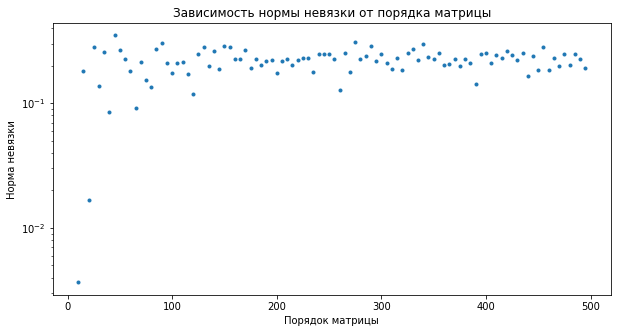

In [9]:
plt.figure(figsize=(10,5))    
plt.semilogy(n_vector, n_discr0,'.')
plt.xlabel('Порядок матрицы')
plt.ylabel('Норма невязки')
plt.title('Зависимость нормы невязки от порядка матрицы')
pass

Значения невязки получились выше, чем в случае с обычными матрицами при решении регуляризованной системы, но ниже, чем в случае с плохообусловленными матрицами при решении обычной системы.

Вывод:
Регуляризованную систему стоит применять, когда мы имеем дело с плохообусловленными матрицы, ведь в среднем значения невязок получаются в несколько раз ниже, чем при решении обычной системой. Однако если мы имеем дело с обычными матрицами, то при применении регуляризованной системы значения невязко получаются выше.